# &#128060; Código Parcial Métodos Numéricos &#128060; 

## Ejercicio 1

Suponga que se está diseñando un tanque esférico para almacenar agua para un poblado pequeño de un país en desarrollo. El volumen del líquido que puede contener, se calcula con 

$V = \pi h^2\cdot \frac{3R-h}{3}$

donde $V = $ volumen $[m^3]$, $h = $ profundidad del agua en el tanque $[m]$ y $R = $ radio del tanque $[m]$. Si $R = 3m$

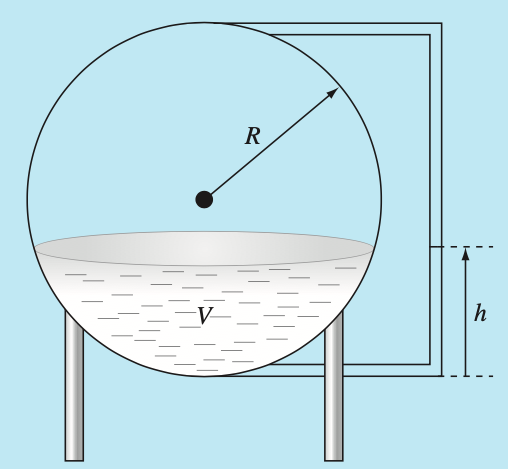

¿A qué profundidad debe llenarse  el tanque de modo que contenga $30 m^3$? Realice tantas iteraciones hasta que $\epsilon_a <\epsilon_s = 0.003\%$

Use dos métodos numéricos y compare.

### Método de Newton-Raphson👨‍🎓

+---------------+-------------------+--------------+
|   Iteraciones |   Raíz Aproximada |     Error(%) |
+===============+===================+==============+
|             1 |           2.37653 | 57.9218      |
+---------------+-------------------+--------------+
|             2 |           2.03741 | 16.6445      |
+---------------+-------------------+--------------+
|             3 |           2.02692 |  0.517586    |
+---------------+-------------------+--------------+
|             4 |           2.02691 |  0.000651414 |
+---------------+-------------------+--------------+


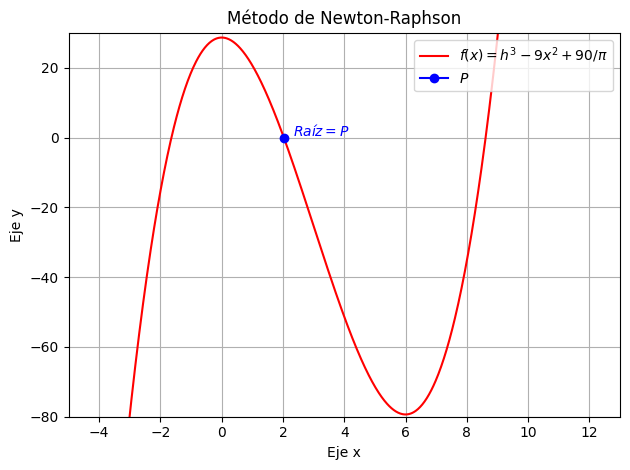

In [3]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Método de Newton Raphson ###
#------------------------------------------------------------------------------------------

data = []

def MetodoNR(f, df, h_0, iteraciones = 1):
    i = 0
    while(i <= iteraciones):
      h_n = h_0 - f(h_0)/df(h_0)
      i += 1
      error = abs((h_n - h_0)/h_n)*100
      Lista = [i, h_n, error]
      data.append(Lista)
      h_0 = h_n
      if(error < 0.003):
        break
    return(h_n)

#------------------------------------------------------------------------------------------
### Se define la función ###
#------------------------------------------------------------------------------------------

def f_1(h):
  return(h**3 - 9*h**2 + 90/np.pi)

def df_1(h):
  return(3*h**2 - 18*h)

#------------------------------------------------------------------------------------------
### Se llama la función ###
#------------------------------------------------------------------------------------------

Raiz = MetodoNR(f_1, df_1, 1, 10)

Eval = f_1(Raiz)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

head = ["Iteraciones", "Raíz Aproximada", "Error(%)"]

print(tabulate(data,headers=head,tablefmt="grid")) 

#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Método de Newton-Raphson")

ax1 = fig_1.add_subplot()

## Llamo la función a graficar

x = np.linspace(-5, 13, 1000)

## Grafica de la Función

ax1.plot(x, f_1(x), "r", label = "$f(x) = h^3 - 9x^2 + 90/\pi$")      #Función 
ax1.plot(Raiz, Eval, marker = "o", color = "b", label = "$P$")   #Raíz aproximada de la función

v = [-5,13,-80,30]         #Acotamiento de la gráfica para x, y

#Detalles de la gráfica

plt.subplot()
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("Método de Newton-Raphson")
plt.grid()
plt.axis(v)
plt.text(Raiz + 0.3, Eval + 0.3 , "$Raíz=P$", color="b")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

### Método de la Secante✍

+---------------+-------------------+--------------+
|   Iteraciones |   Raíz Aproximada |     Error(%) |
+===============+===================+==============+
|             1 |           2.75727 | 63.7322      |
+---------------+-------------------+--------------+
|             2 |           1.9195  | 43.6452      |
+---------------+-------------------+--------------+
|             3 |           2.01984 |  4.96804     |
+---------------+-------------------+--------------+
|             4 |           2.027   |  0.353121    |
+---------------+-------------------+--------------+
|             5 |           2.02691 |  0.00477112  |
+---------------+-------------------+--------------+
|             6 |           2.02691 |  4.08049e-06 |
+---------------+-------------------+--------------+


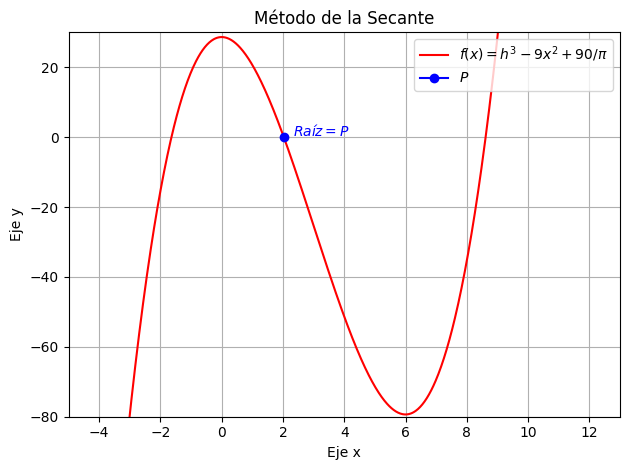

In [1]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Método de la Secante ###
#------------------------------------------------------------------------------------------

data = []

def MetodoSecante(f, h_00, h_01, iteraciones = 1):
    i = 0
    while(i <= iteraciones):
      h_n = h_01 - (f(h_01)*(h_00 - h_01))/(f(h_00) - f(h_01))
      i += 1
      error = abs(((h_n - h_01)/h_n)*100)
      Lista = [i, h_n, error]
      data.append(Lista)
      h_00 = h_01
      h_01 = h_n
      if (error < 0.003):
         break
    return(h_n)

#------------------------------------------------------------------------------------------
### Se define la función ###
#------------------------------------------------------------------------------------------

def f_1(h):
  return(h**3 - 9*h**2 + 90/np.pi)

#------------------------------------------------------------------------------------------
### Se llama la función ###
#------------------------------------------------------------------------------------------

Raiz = MetodoSecante(f_1, 0.5, 1, 10)

Eval = f_1(Raiz)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

head = ["Iteraciones", "Raíz Aproximada", "Error(%)"]

print(tabulate(data,headers=head,tablefmt="grid")) 

#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Método de la Secante")

ax1 = fig_1.add_subplot()

x = np.linspace(-5, 13, 1000)

## Grafica de la Función

ax1.plot(x, f_1(x), "r", label = "$f(x) = h^3 - 9x^2 + 90/\pi$")      #Función 
ax1.plot(Raiz, Eval, marker = "o", color = "b", label = "$P$")   #Raíz aproximada de la función

v = [-5,13,-80,30]         #Acotamiento de la gráfica para x, y

#Detalles de la gráfica

plt.subplot()
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("Método de la Secante")
plt.grid()
plt.axis(v)
plt.text(Raiz + 0.3, Eval + 0.3 , "$Raíz=P$", color="b")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

El polinomio de Interpolación de Newton es:
8.36159788843136e-6*x*(x - 20)*(x - 17)*(x - 13)*(x - 10)*(x - 6) - 0.000200680761815216*x*(x - 17)*(x - 13)*(x - 10)*(x - 6) + 0.00255412234824*x*(x - 13)*(x - 10)*(x - 6) - 0.0151300366300366*x*(x - 10)*(x - 6) - 0.0878333333333333*x*(x - 6) + 1.57333333333333*x + 6.67

Simplificando:
8.36159788843136e-6*x**6 - 0.000752546222451685*x**5 + 0.025841283442193*x**4 - 0.413798650664971*x**3 + 2.91280910177556*x**2 - 5.67820695777782*x + 6.67

La aproximación para y=20 es:  9.439999999994752
La aproximación para y=40 es:  1298.9800259480262
La aproximación para y=75 es:  361385.7277936294
La aproximación para y=110 es:  5960531.911723248


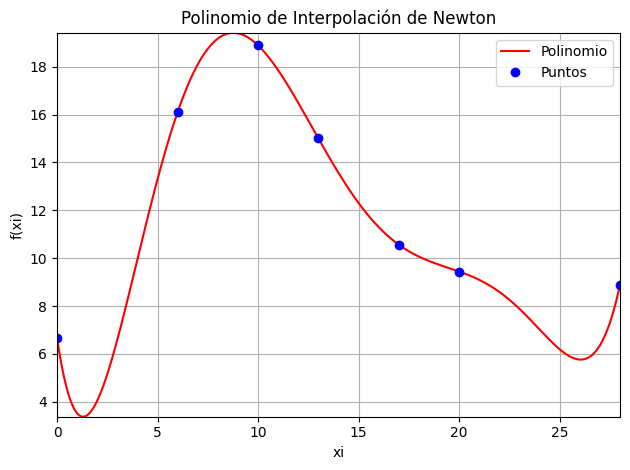

In [2]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Polinomio de Newton ###
#------------------------------------------------------------------------------------------

x = sp.Symbol('x')

def InterpolacionNewton(x_i, f_i):

    # Diferencias Divididas 
    titulo = ['i   ','xi  ','fi  ']
    n = len(x_i)
    ki = np.arange(0,n,1)
    tabla = np.concatenate(([ki],[x_i],[f_i]),axis=0)
    tabla = np.transpose(tabla)

    # diferencias divididas vacia
    dfinita = np.zeros(shape=(n,n),dtype=float)
    tabla = np.concatenate((tabla,dfinita), axis=1)

    # Calcula tabla, inicia en columna 3
    [n,m] = np.shape(tabla)
    diagonal = n-1
    j = 3

    while (j < m):
        # Añade título para cada columna
        titulo.append('F['+str(j-2)+']')

        # cada fila de columna
        i = 0
        paso = j-2 # inicia en 1
        while (i < diagonal):
            denominador = (x_i[i+paso]-x_i[i])
            numerador = tabla[i+1,j-1]-tabla[i,j-1]
            tabla[i,j] = numerador/denominador
            i = i+1
        diagonal = diagonal - 1
        j = j+1

    # POLINOMIO con diferencias Divididas
    # caso: puntos equidistantes en eje x
    dDividida = tabla[0,3:]
    n = len(dfinita)

    # expresión del polinomio con Sympy
    x = sp.Symbol('x')
    polinomio = f_i[0]
    for j in range(1,n,1):
        factor = dDividida[j-1]
        termino = 1
        for k in range(0,j,1):
            termino = termino*(x-x_i[k])
        polinomio = polinomio + termino*factor
    return(polinomio)

#------------------------------------------------------------------------------------------
### Llamando la función ###
#------------------------------------------------------------------------------------------
 
#Datos
xi = np.array([0, 6, 10, 13, 17, 20, 28])
fi = np.array([6.67, 16.11, 18.89, 15.00, 10.56, 9.44, 8.89])

Pol = InterpolacionNewton(xi, fi)

#Simplificar

polisimple = InterpolacionNewton(xi, fi).expand()

# para evaluación numérica
px = sp.lambdify(x, polisimple)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

print('El polinomio de Interpolación de Newton es:')

print(Pol)

print()

print('Simplificando:')

print(polisimple)

print()

print('La aproximación para y=20 es: ', px(20))

print('La aproximación para y=40 es: ', px(40))

print('La aproximación para y=75 es: ', px(75))

print('La aproximación para y=110 es: ', px(110))

#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Polinomio de Interpolación de Newton")

ax1 = fig_1.add_subplot()

## Llamo la función a graficar

a = np.min(xi)
b = np.max(xi)

pxi = np.linspace(a, b, 1000)
pfi = px(pxi)

## Grafica de la Función

ax1.plot(pxi, pfi, "r", label = "Polinomio")      #Polinomio 
ax1.plot(xi, fi, 'o', color = 'b', label = "Puntos")   #Puntos

v = [np.min(xi), np.max(xi), np.min(pfi), np.max(pfi)]   #Acotamiento de la gráfica para x, y

#Detalles de la gráfica

plt.subplot()
plt.xlabel("xi")
plt.ylabel("f(xi)")
plt.title("Polinomio de Interpolación de Newton")
plt.grid()
plt.axis(v)
plt.legend(loc=1)

plt.tight_layout()
plt.show()

Los valores de x son [ 0  6 10 13 17 20 28]
Los valores de f(x) [ 6.67 16.11 18.89 15.   10.56  9.44  8.89]

Polinomio de Lagrange expresado:
-2.83036768426379e-5*x*(x - 28)*(x - 20)*(x - 17)*(x - 13)*(x - 10) + 0.000124933862433862*x*(x - 28)*(x - 20)*(x - 17)*(x - 13)*(x - 6) - 0.000130821559392988*x*(x - 28)*(x - 20)*(x - 17)*(x - 10)*(x - 6) + 6.11153552330023e-5*x*(x - 28)*(x - 20)*(x - 13)*(x - 10)*(x - 6) - 2.00680272108844e-5*x*(x - 28)*(x - 17)*(x - 13)*(x - 10)*(x - 6) + 6.07399755127028e-7*x*(x - 20)*(x - 17)*(x - 13)*(x - 10)*(x - 6) + 8.98243912949795e-7*(x - 28)*(x - 20)*(x - 17)*(x - 13)*(x - 10)*(x - 6)

El Polinomio de Lagrange es:

8.36159788843139e-6*x**6 - 0.000752546222451686*x**5 + 0.0258412834421931*x**4 - 0.413798650664972*x**3 + 2.91280910177557*x**2 - 5.67820695777782*x + 6.67

La aproximación para y=20 es:  9.440000000005666
La aproximación para y=40 es:  1298.9800259482572
La aproximación para y=75 es:  361385.72779363504
La aproximación para y=110 es:  5960

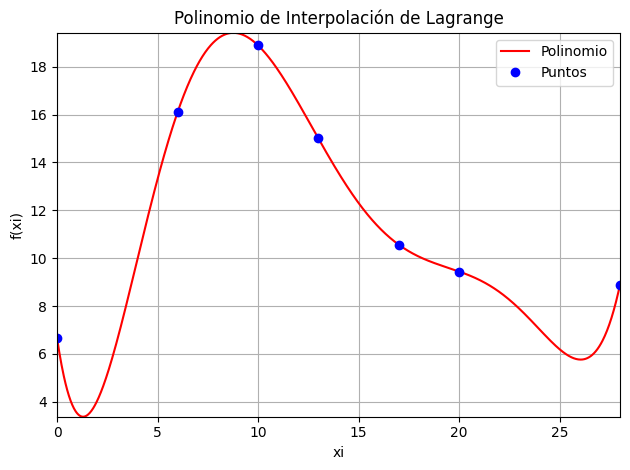

In [3]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Interpolación de Lagrange ###
#------------------------------------------------------------------------------------------

x = sp.Symbol('x')

def InterpolacionLagrange(x_i, f_i):

  n = len(x_i)
  x = sp.Symbol('x')
  polinomio = 0
  divisorL = np.zeros(n, dtype = float)

  for i in range(0, n, 1):
    numerador = 1
    denominador = 1

    for j in range(0, n, 1):
      if (j != i):
        numerador = numerador*(x - x_i[j])
        denominador = denominador*(x_i[i] - x_i[j])

    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*f_i[i]
    divisorL[i] = denominador
  return(polinomio)


#------------------------------------------------------------------------------------------
### Llamando la función ###
#------------------------------------------------------------------------------------------

#Datos

xi = np.array([0, 6, 10, 13, 17, 20, 28])
fi = np.array([6.67, 16.11, 18.89, 15.00, 10.56, 9.44, 8.89])

Pol = InterpolacionLagrange(xi, fi)

#Simplificar

polisimple = InterpolacionLagrange(xi, fi).expand()

# para evaluación numérica
px = sp.lambdify(x, polisimple)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

print('Los valores de x son', xi)

print('Los valores de f(x)', fi)

print()

print("Polinomio de Lagrange expresado:")

print(Pol)

print()

print("El Polinomio de Lagrange es:")

print()

print(polisimple)

print()

print('La aproximación para y=20 es: ', px(20))

print('La aproximación para y=40 es: ', px(40))

print('La aproximación para y=75 es: ', px(75))

print('La aproximación para y=110 es: ', px(110))
#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Polinomio de Interpolación de Lagrange")

ax1 = fig_1.add_subplot()

## Llamo la función a graficar

a = np.min(xi)
b = np.max(xi)

pxi = np.linspace(a, b, 1000)
pfi = px(pxi)

## Grafica de la Función

ax1.plot(pxi, pfi, "r", label = "Polinomio")      #Polinomio 
ax1.plot(xi, fi, 'o', color = 'b', label = "Puntos")   #Puntos

v = [np.min(xi), np.max(xi), np.min(pfi), np.max(pfi)]   #Acotamiento de la gráfica para x, y

#Detalles de la gráfica

plt.subplot()
plt.xlabel("xi")
plt.ylabel("f(xi)")
plt.title("Polinomio de Interpolación de Lagrange")
plt.grid()
plt.axis(v)
plt.legend(loc=1)

plt.tight_layout()
plt.show()